In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

from advanced.advanced_grid_env import AdvGridWorldEnvSlow, AdvGridWorldEnvFast
from mc import MonteCarloAgent
from q_learning import QLearningAgent
from sarsa import SarsaAgent

def plot_r_s(rewards_per_episode, steps_per_episode):
	# Plotting the rewards and steps over episodes
	plt.figure(figsize=(12, 5))

	plt.subplot(1, 2, 1)
	plt.plot(rewards_per_episode)
	plt.title('Total Rewards per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Total Reward')

	plt.subplot(1, 2, 2)
	plt.plot(steps_per_episode)
	plt.title('Steps per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Steps')

	plt.tight_layout()
	plt.show()

In [10]:
random_seed = 2021
np.random.seed(random_seed)
random.seed(random_seed)


height = 4
width = 4

state_size = height * width

num_episodes = 3000
max_steps_per_episode = 600

hangar = AdvGridWorldEnvSlow(height, width, 'material')

random_seed = 2021
np.random.seed(random_seed)
random.seed(random_seed)

warehouse = AdvGridWorldEnvSlow(height+2, width+2, 'clean')

random_seed = 2020
np.random.seed(random_seed)
random.seed(random_seed)

garage = AdvGridWorldEnvSlow(height, width, 'recharge')


Episode 100/3000 - Total Reward: 10, Steps: 10, Epsilon: 0.3635
Episode 200/3000 - Total Reward: 10, Steps: 3, Epsilon: 0.2202
Episode 300/3000 - Total Reward: 10, Steps: 4, Epsilon: 0.1334
Episode 400/3000 - Total Reward: 10, Steps: 4, Epsilon: 0.0808
Episode 500/3000 - Total Reward: 10, Steps: 4, Epsilon: 0.0489
Episode 600/3000 - Total Reward: 10, Steps: 5, Epsilon: 0.0296
Episode 700/3000 - Total Reward: 10, Steps: 3, Epsilon: 0.0180
Episode 800/3000 - Total Reward: 10, Steps: 5, Epsilon: 0.0109
Episode 900/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1000/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1100/3000 - Total Reward: 10, Steps: 5, Epsilon: 0.0100
Episode 1200/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1300/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1400/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1500/3000 - Total Reward: -10, Steps: 3, Epsilon: 0.0100
Episode 1600/3000 - Total Reward: 10, Steps: 4,

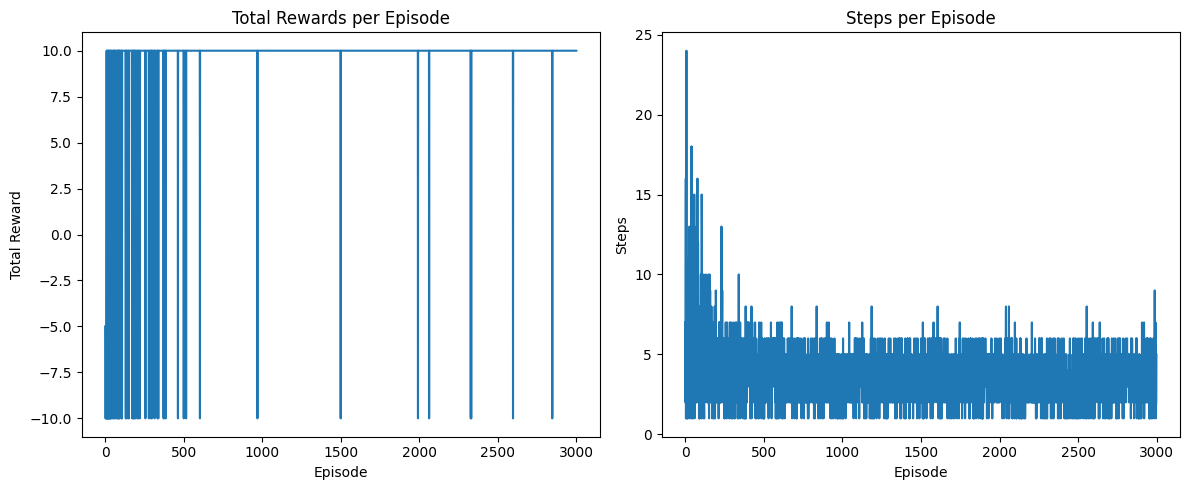

In [11]:
def q_learning(env, state_size, num_episodes, max_steps_per_episode):
    action_size = len(env.actions)
    q_agent = QLearningAgent(env, state_size=state_size, action_size=action_size)

    rewards_per_episode = []
    steps_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()  # Reset slow_environment at the start of each episode
        done = False
        total_reward = 0
        steps = 0

        for step in range(max_steps_per_episode):
            action = q_agent.choose_action(state)  # Choose an action based on current policy
            next_state, reward, done, _ = env.step(env.actions[action])

            q_agent.learn(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            steps += 1

            if done:
                break

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {total_reward}, Steps: {steps}, Epsilon: {q_agent.epsilon:.4f}")

    return rewards_per_episode, steps_per_episode, q_agent


rewards_per_episode, steps_per_episode, q_agent = q_learning(hangar, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [12]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
hangar.print_policy(slow_q_learned_policy)
hangar.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| → | ↓ | X | X |
+---+---+---+---+
| → | ↓ | → | ↓ |
+---+---+---+---+
| → | → | → | ↓ |
+---+---+---+---+
| X | ↑ | X | T |
+---+---+---+---+

+---+---+---+---+
| ⚙ | . | X | X |
+---+---+---+---+
| . | . | . | . |
+---+---+---+---+
| . | . | . | . |
+---+---+---+---+
| X | ⚙ | X | H |
+---+---+---+---+



Episode 100/3000 - Total Reward: -10, Steps: 3, Epsilon: 0.3635
Episode 200/3000 - Total Reward: -10, Steps: 64, Epsilon: 0.2202
Episode 300/3000 - Total Reward: -10, Steps: 52, Epsilon: 0.1334
Episode 400/3000 - Total Reward: -10, Steps: 7, Epsilon: 0.0808
Episode 500/3000 - Total Reward: -10, Steps: 106, Epsilon: 0.0489
Episode 600/3000 - Total Reward: 0, Steps: 600, Epsilon: 0.0301
Episode 700/3000 - Total Reward: -10, Steps: 44, Epsilon: 0.0183
Episode 800/3000 - Total Reward: 10, Steps: 6, Epsilon: 0.0112
Episode 900/3000 - Total Reward: 10, Steps: 7, Epsilon: 0.0100
Episode 1000/3000 - Total Reward: 10, Steps: 11, Epsilon: 0.0100
Episode 1100/3000 - Total Reward: 10, Steps: 7, Epsilon: 0.0100
Episode 1200/3000 - Total Reward: 10, Steps: 23, Epsilon: 0.0100
Episode 1300/3000 - Total Reward: 10, Steps: 11, Epsilon: 0.0100
Episode 1400/3000 - Total Reward: 10, Steps: 11, Epsilon: 0.0100
Episode 1500/3000 - Total Reward: 10, Steps: 11, Epsilon: 0.0100
Episode 1600/3000 - Total Reward

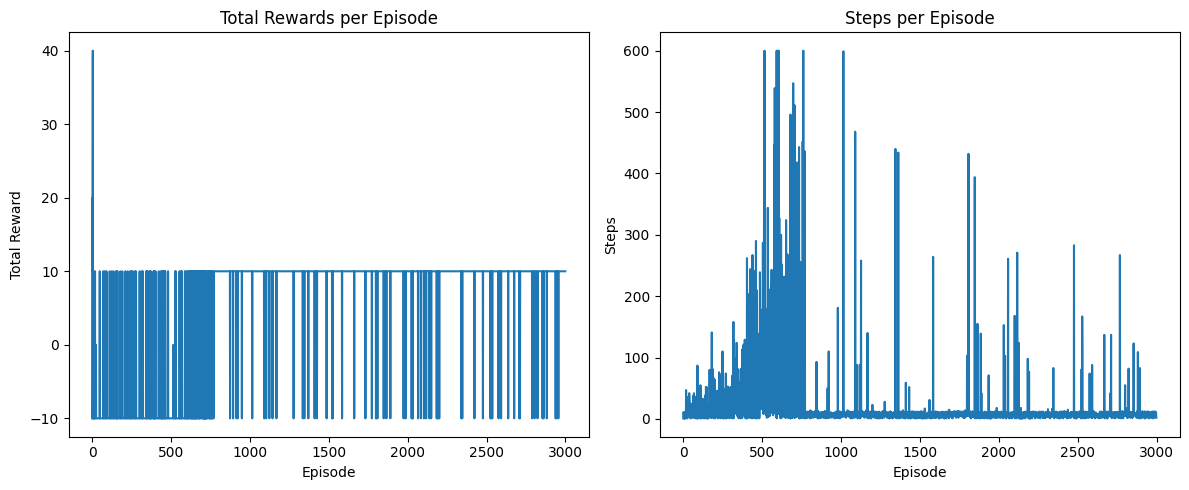

In [13]:
rewards_per_episode, steps_per_episode, q_agent = q_learning(warehouse, (height+2) * (width+2), num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [14]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
warehouse.print_policy(slow_q_learned_policy)
warehouse.print_board()

Learned Q-learning Policy:
+---+---+---+---+---+---+
| ↓ | X | ↓ | ← | X | T |
+---+---+---+---+---+---+
| → | → | → | → | → | ↑ |
+---+---+---+---+---+---+
| X | ↑ | ← | ↑ | X | ↑ |
+---+---+---+---+---+---+
| → | ↑ | ← | X | X | X |
+---+---+---+---+---+---+
| → | → | ↑ | ← | ← | ← |
+---+---+---+---+---+---+
| X | ← | ↑ | ↑ | ↑ | X |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
| o | X | 🗑 | 🗑 | X | E |
+---+---+---+---+---+---+
| 🗑 | 🗑 | 🗑 | 🗑 | 🗑 | 🗑 |
+---+---+---+---+---+---+
| X | 🗑 | 🗑 | 🗑 | X | 🗑 |
+---+---+---+---+---+---+
| 🗑 | 🗑 | 🗑 | X | X | X |
+---+---+---+---+---+---+
| 🗑 | 🗑 | 🗑 | 🗑 | 🗑 | 🗑 |
+---+---+---+---+---+---+
| X | 🗑 | 🗑 | 🗑 | 🗑 | X |
+---+---+---+---+---+---+



Episode 100/3000 - Total Reward: 10, Steps: 3, Epsilon: 0.3635
Episode 200/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.2202
Episode 300/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.1334
Episode 400/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0808
Episode 500/3000 - Total Reward: -10, Steps: 1, Epsilon: 0.0489
Episode 600/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0296
Episode 700/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0180
Episode 800/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0109
Episode 900/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1000/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1100/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1200/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1300/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1400/3000 - Total Reward: 10, Steps: 2, Epsilon: 0.0100
Episode 1500/3000 - Total Reward: 10, Steps: 1, Epsilon: 0.0100
Episode 1600/3000 - Total Reward: 10, Steps: 3, 

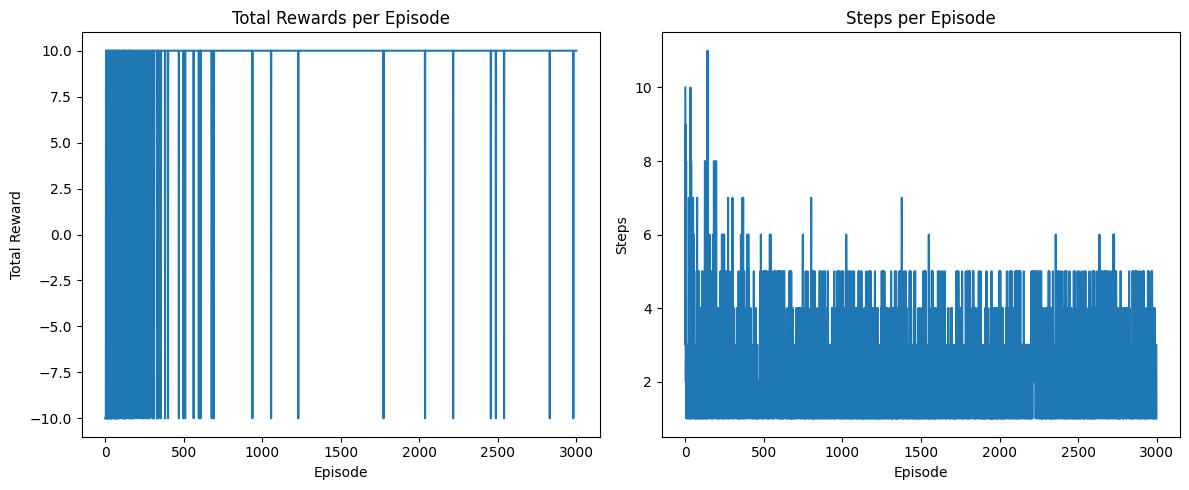

In [15]:
rewards_per_episode, steps_per_episode, q_agent = q_learning(garage, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [16]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
garage.print_policy(slow_q_learned_policy)
garage.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| X | → | ↓ | ↓ |
+---+---+---+---+
| ↓ | X | → | ← |
+---+---+---+---+
| ↓ | X | → | ↑ |
+---+---+---+---+
| → | → | ↑ | X |
+---+---+---+---+

+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| . | X | . | ⌁ |
+---+---+---+---+
| . | X | ⌁ | . |
+---+---+---+---+
| o | . | . | X |
+---+---+---+---+

